## 穴埋めゴミ方式

ゴミ方式
1. この分布を意識しつつ、0にめちゃくちゃ触れているところは０を入れる。
2. ０以外が最頻値のものは迷いなくそれを採用。
3. その間の0が微妙なやつは、０の数を２０個くらいに調整しつつ、それ以外も採用しながら選ぶ

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
ATTACK_TARGET = "05"
MAIN = False # True: メインの攻撃, False: 予備選の攻撃

DIR = "../data" if MAIN else "../predata/anonymization_data"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [20]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [21]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,M,1,7,181,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M,1,7,970,0,0,0,0,0,0,0,0,3,0,0,0,0
2,M,1,20,89,0,0,0,3,0,0,3,0,0,0,0,0,0
3,M,18,2,836,0,0,0,3,0,0,5,0,1,1,0,0,5
4,M,18,4,171,0,0,0,3,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,25,6,178,0,3,5,3,1,1,2,5,1,0,5,0,1
9996,F,25,4,319,5,0,5,4,4,0,3,5,0,5,5,0,0
9997,F,18,2,794,5,4,5,1,2,1,5,5,3,1,5,0,1
9998,F,45,2,441,3,3,5,2,5,2,2,5,1,1,5,1,5


### Ba, Bbの読み込み

In [22]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Teddie Carcas,F,56,8,758
1,Normie Rabidge,M,25,12,430
2,Freddy Sallter,M,1,10,934
3,Reed Groneway,M,25,14,488
4,Delores Beverstock,F,18,19,911


In [23]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,0,0,4,3,2,4,2,1,4,4,...,3,3,5,0,3,0,5,2,5,1
1,0,2,1,2,3,0,2,0,0,0,...,4,0,0,0,0,5,5,3,4,0
2,5,4,0,3,2,5,3,*,0,2,...,1,0,0,1,0,1,2,1,0,0
3,0,1,1,4,0,2,2,2,4,1,...,3,0,1,0,5,0,*,3,1,3
4,5,4,0,5,4,0,1,0,0,2,...,2,1,0,4,0,0,0,1,2,0


### 攻撃に利用するGAOZと映画のIDの全ペア

In [24]:
import itertools

cross_tab_pairs = []

pairs_set = set()
for b_review_headers in B_REVIEW_HEADERS_LIST:
    for pair in itertools.combinations(b_review_headers, 2):
        pairs_set.add(pair)

for pair in itertools.combinations(MOVIE_IDS, 2):
    if pair in pairs_set:
        cross_tab_pairs.append(pair)

print(f"ペアの数: {len(cross_tab_pairs)}")
cross_tab_pairs[:5]

ペアの数: 607


[('2', '56'), ('2', '260'), ('2', '653'), ('2', '673'), ('2', '810')]

### C0~C9の各cross集計の平均をとる

In [25]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='all')
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

cross_tabs[cross_tab_pairs[1]]

260,0,1,2,3,4,5
2,,,,,,
0,0.0636,0.0336,0.0711,0.0293,0.0654,0.1353
1,0.0149,0.0072,0.0197,0.0064,0.0126,0.0256
2,0.0170,0.0093,0.0201,0.0076,0.0145,0.0313
3,0.0136,0.0100,0.0193,0.0085,0.0188,0.0307
4,0.0291,0.0173,0.0378,0.0150,0.0315,0.0583
5,0.0190,0.0120,0.0234,0.0102,0.0208,0.0402


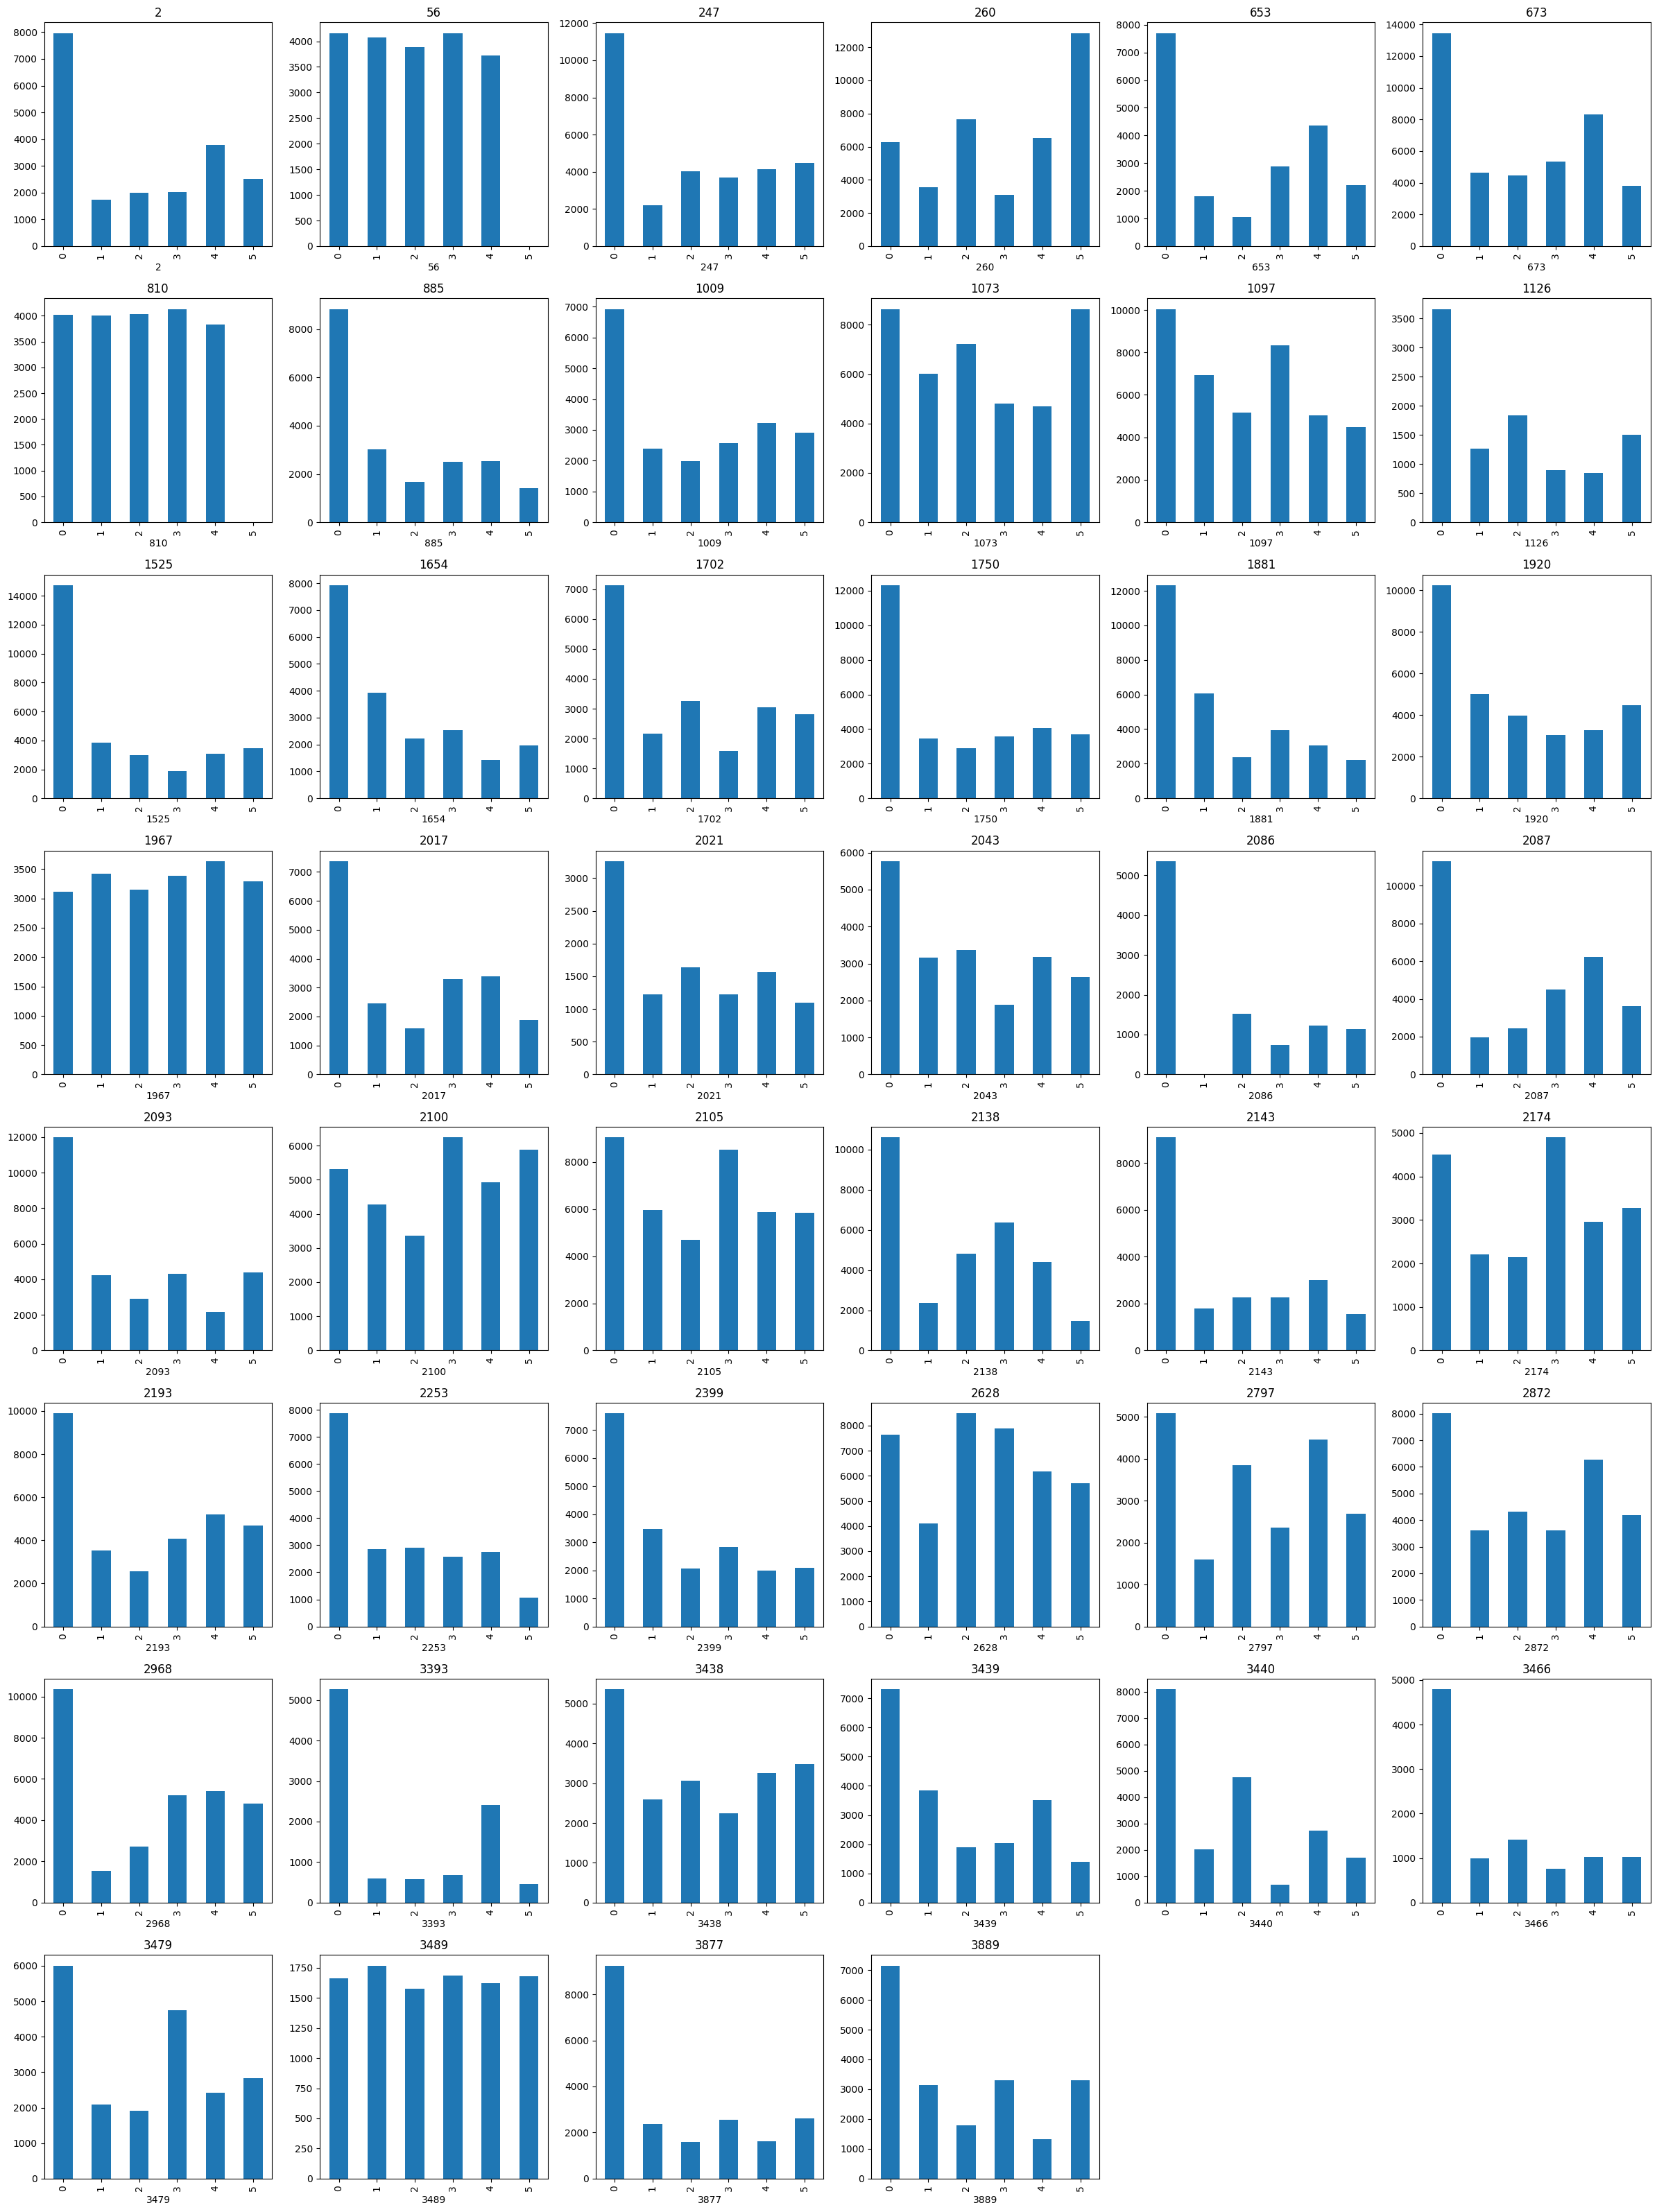

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# combined_dataが既に定義されていると仮定します

# カラムの総数を取得
num_cols = len(MOVIE_IDS)
# 列数を6に設定
num_per_row = 6
# 必要な行数を計算
num_rows = int(np.ceil(num_cols / num_per_row))

# サブプロットを作成
fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=(24, num_rows * 4))
axes = axes.flatten()

# # 各カラムに対して棒グラフを描画
for i, col in enumerate(MOVIE_IDS):
    value_counts = combined_data[col].value_counts().sort_index()
    value_counts.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)

# 余ったサブプロットを削除
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
MAX_0_COUNT = 28

NO_CONDITION_0_THRESHOLD = 0.3

hidden_movie_id_list = []
for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            hidden_movie_id_list.append(hidden_movie_id)
            break
assert len(hidden_movie_id_list) == 50
np.array(hidden_movie_id_list)
answer_df = pd.DataFrame(index=range(50), columns=["AnaMovieId", "Answer", "NoCondition0", "MaxOther0"])
answer_df["AnaMovieId"] = hidden_movie_id_list
answer_df.head()

,AnaMovieId,Answer,NoCondition0,MaxOther0
0,2174,NaN,NaN,NaN
1,1097,NaN,NaN,NaN
2,885,NaN,NaN,NaN
3,3479,NaN,NaN,NaN
4,2253,NaN,NaN,NaN


In [28]:
histgrams = []

for movie_id in MOVIE_IDS:
    histgram = combined_data[movie_id].value_counts(normalize=True).sort_index()
    histgram.name = movie_id
    histgrams.append(histgram)

histgram_df = pd.concat(histgrams, axis=1)
histgram_df

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,0.3983,0.2079,0.3822,0.1572,0.3850,0.3363,0.2008,0.4418,0.3461,0.2159,...,0.3448,0.5264,0.2679,0.3653,0.4044,0.4789,0.3003,0.1664,0.4625,0.3576
1,0.0864,0.2034,0.0731,0.0894,0.0900,0.1155,0.2003,0.1511,0.1195,0.1506,...,0.0514,0.0598,0.1293,0.1921,0.1016,0.0987,0.1040,0.1769,0.1193,0.1574
2,0.0998,0.1944,0.1342,0.1914,0.0531,0.1112,0.2013,0.0842,0.0987,0.1806,...,0.0901,0.0581,0.1535,0.0947,0.2383,0.1414,0.0955,0.1578,0.0799,0.0898
3,0.1009,0.2080,0.1232,0.0770,0.1436,0.1337,0.2064,0.1253,0.1288,0.1201,...,0.1735,0.0684,0.1125,0.1014,0.0338,0.0754,0.2376,0.1687,0.1273,0.1645
4,0.1890,0.1863,0.1377,0.1636,0.2177,0.2084,0.1912,0.1265,0.1617,0.1171,...,0.1806,0.2414,0.1624,0.1761,0.1369,0.1025,0.1211,0.1621,0.0810,0.0662
5,0.1256,0.0000,0.1496,0.3214,0.1106,0.0949,0.0000,0.0711,0.1452,0.2157,...,0.1596,0.0459,0.1744,0.0704,0.0850,0.1031,0.1415,0.1681,0.1300,0.1645


In [29]:
ranking_0 = histgram_df.loc[0].sort_values(ascending=False)
filtered_ranking_0 = ranking_0[ranking_0 > NO_CONDITION_0_THRESHOLD].index.values
filtered_ranking_0

array(['2086', '3393', '1525', '3466', '3877', '2143', '885', '1881',
       '1750', '3440', '2093', '2', '1654', '2253', '653', '247', '2399',
       '2087', '2017', '1126', '3439', '3889', '1702', '2138', '1009',
       '2968', '1920', '673', '2193', '2021', '3479'], dtype=object)

In [30]:
answer_df["NoCondition0"] = answer_df["AnaMovieId"].apply(lambda x: x in filtered_ranking_0)
answer_df

,AnaMovieId,Answer,NoCondition0,MaxOther0
0,2174,NaN,False,NaN
1,1097,NaN,False,NaN
2,885,NaN,True,NaN
3,3479,NaN,True,NaN
4,2253,NaN,True,NaN
5,2143,NaN,True,NaN
6,1920,NaN,True,NaN
7,2193,NaN,True,NaN
8,2968,NaN,True,NaN
9,247,NaN,True,NaN


In [31]:
max_other_0 = []

for movie_id in answer_df["AnaMovieId"]:
    hist = histgram_df[movie_id]
    hist = hist.drop(0)
    hist.argmax()
    max_other_0.append(hist.argmax() + 1)
    # break
    # max_other_0 = 

# for i in range(50):
answer_df["MaxOther0"] = max_other_0

answer_df

,AnaMovieId,Answer,NoCondition0,MaxOther0
0,2174,NaN,False,3
1,1097,NaN,False,3
2,885,NaN,True,1
3,3479,NaN,True,3
4,2253,NaN,True,2
5,2143,NaN,True,4
6,1920,NaN,True,1
7,2193,NaN,True,4
8,2968,NaN,True,4
9,247,NaN,True,5


In [32]:
answer_df['Answer'] = np.where(answer_df['NoCondition0'], 0, answer_df['MaxOther0'])
result_list = list(answer_df['Answer'])

In [33]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    print(X_ANSWER)
    print(my_answer)

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

[2 5 2 3 2 4 0 2 5 2 3 0 2 0 3 0 0 2 2 4 1 4 2 0 4 5 1 3 3 4 2 4 3 4 3 2 1
 0 0 1 0 3 2 1 4 0 2 4 0 4]
[3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0, 4, 0, 5, 0, 2, 3, 3, 0, 3, 5, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 4]


マッチングの成功率: <span style='color:yellow'>12</span> / 50

In [34]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>31</span>

🚨 <span style='color:yellow'>0が30以上です</span>